1. Collecting dataset using different sources like Kaggle, google datasets


2. Load a dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
Iris_Data = pd.read_csv("/content/Iris.csv")

In [ ]:
Iris_Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


3. Preprocessing dataset

In [ ]:
# Data Cleaning
Iris_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
Iris_Data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
Iris_Data['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
Iris_Data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [ ]:
Iris_Data.duplicated().sum()

np.int64(0)

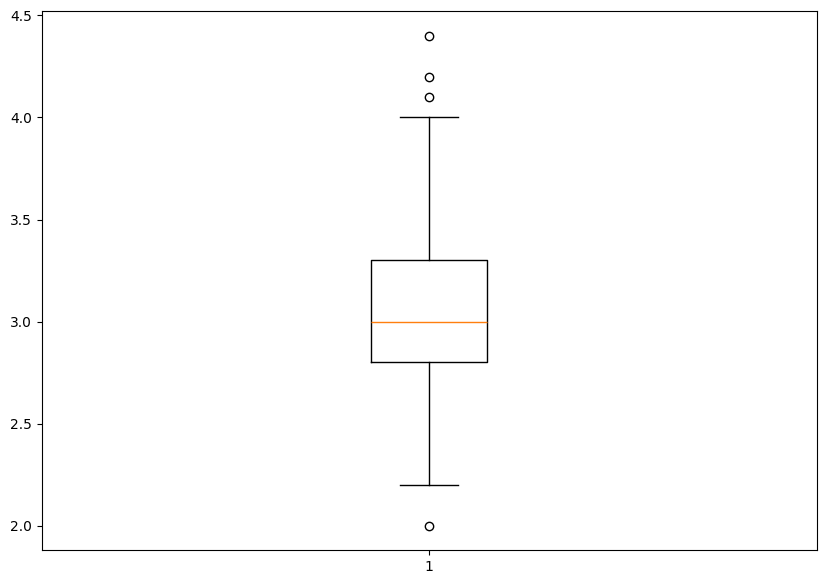

In [ ]:
# Checking outlier
plt.figure(figsize=(10,7))
plt.boxplot(data=Iris_Data, x='SepalWidthCm'  )
plt.show()

In [ ]:
# iqr Method
q1 = Iris_Data['SepalWidthCm'].quantile(0.25)
q2 = Iris_Data['SepalWidthCm'].quantile(0.75)
iqr=q1-q2

In [ ]:
q1,q2,iqr

(np.float64(2.8), np.float64(3.3), np.float64(-0.5))

In [ ]:
upper_limit = q2+1.5*iqr
lower_limit = q1-1.5*iqr


In [ ]:
upper_limit,lower_limit

(np.float64(2.55), np.float64(3.55))

In [ ]:
# Find outliner
Iris_Data.loc[(Iris_Data['SepalWidthCm'] > upper_limit) | (Iris_Data['SepalWidthCm'] < lower_limit)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#capping
Iris_Data.loc[(Iris_Data['SepalWidthCm'] > upper_limit) ,'SepalWidthCm'] = upper_limit
Iris_Data.loc[(Iris_Data['SepalWidthCm'] < lower_limit) ,'SepalWidthCm'] = lower_limit

<Axes: ylabel='SepalWidthCm'>

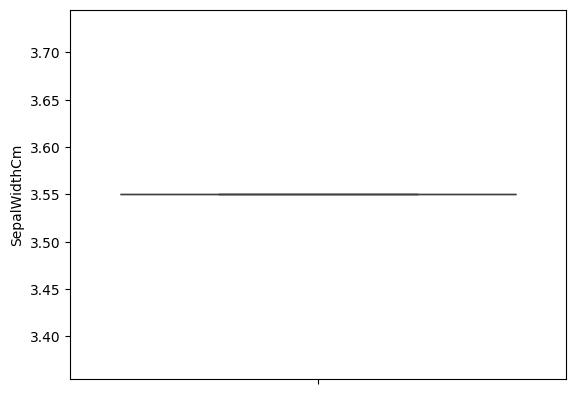

In [ ]:
sns.boxplot(Iris_Data['SepalWidthCm'])

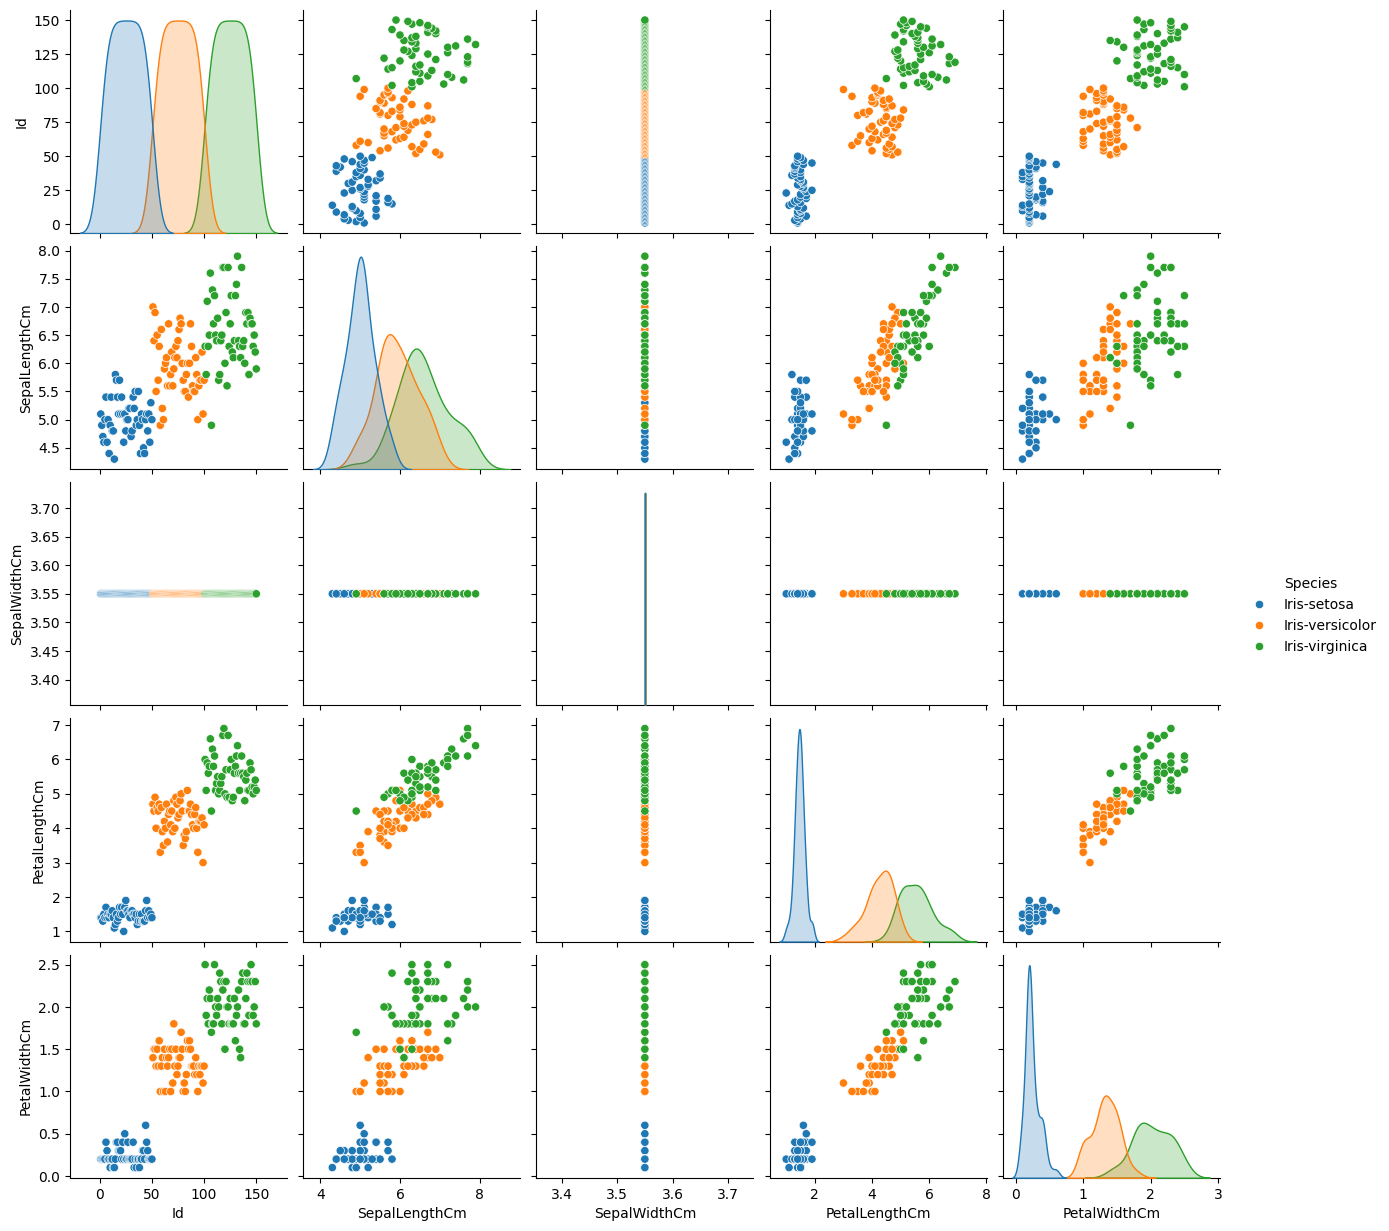

In [ ]:
sns.pairplot(Iris_Data , hue='Species')

In [ ]:
x=Iris_Data.drop(['Id','Species'],axis=1)
y=Iris_Data['Species']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x.shape,x_train.shape,x_test.shape

((150, 4), (120, 4), (30, 4))

In [ ]:
# bulit a model
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction=model.predict(x_test)

In [ ]:
accuracy_score(prediction,y_test)

0.9666666666666667

['Iris-setosa']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
